In [1]:
from hil_control.hw_rev4_dock_undock import HwRev4DockUndock, pcu
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import datetime

In [22]:
pcu.cmd_dock()
pcu.cmd_power_hdd_on()

In [2]:
test = HwRev4DockUndock()

In [11]:
test.prepare()

umount: /dev/BASE_USB_STICK: No such file or directory
102+0 records in
102+0 records out
1069547520 bytes (1,1 GB, 1020 MiB) copied, 2,18228 s, 490 MB/s


In [ ]:
test.run(iterations=1000)

2023-09-24 22:30:19 - hil_control.hw_rev4_dock_undock - INFO - finished run 0. Id_avg = 147.1, Id_max = 287.0, Iud_avg 143.2, Iud_max = 314.0, TR=31.4 MB/s, t = 47.1s
2023-09-24 22:31:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 1. Id_avg = 144.8, Id_max = 289.0, Iud_avg 147.6, Iud_max = 438.0, TR=37.1 MB/s, t = 42.7s
2023-09-24 22:31:45 - hil_control.hw_rev4_dock_undock - INFO - finished run 2. Id_avg = 146.9, Id_max = 287.0, Iud_avg 147.2, Iud_max = 302.0, TR=37.4 MB/s, t = 42.8s
2023-09-24 22:32:23 - hil_control.hw_rev4_dock_undock - INFO - finished run 3. Id_avg = 146.2, Id_max = 299.0, Iud_avg 146.0, Iud_max = 289.0, TR=42.8 MB/s, t = 38.2s
2023-09-24 22:32:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 4. Id_avg = 147.9, Id_max = 303.0, Iud_avg 144.6, Iud_max = 312.0, TR=52.4 MB/s, t = 34.9s
2023-09-24 22:33:47 - hil_control.hw_rev4_dock_undock - INFO - finished run 5. Id_avg = 148.6, Id_max = 290.0, Iud_avg 148.5, Iud_max = 498.0, TR=29.9 MB/s, t = 48.6

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 22:36:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 9. Id_avg = 146.3, Id_max = 300.0, Iud_avg 148.5, Iud_max = 579.0, TR=70.8 MB/s, t = 28.5s
2023-09-24 22:36:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 10. Id_avg = 146.4, Id_max = 300.0, Iud_avg 145.8, Iud_max = 422.0, TR=34.2 MB/s, t = 45.5s
2023-09-24 22:37:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 11. Id_avg = 150.5, Id_max = 494.0, Iud_avg 147.8, Iud_max = 509.0, TR=52.6 MB/s, t = 33.9s
2023-09-24 22:38:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 12. Id_avg = 149.0, Id_max = 305.0, Iud_avg 145.1, Iud_max = 319.0, TR=38.8 MB/s, t = 40.8s
2023-09-24 22:38:45 - hil_control.hw_rev4_dock_undock - INFO - finished run 13. Id_avg = 146.7, Id_max = 283.0, Iud_avg 146.6, Iud_max = 396.0, TR=51.5 MB/s, t = 34.9s
2023-09-24 22:39:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 14. Id_avg = 146.9, Id_max = 284.0, Iud_avg 145.2, Iud_max = 455.0, TR=36.1 MB/s, t =

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 22:50:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 31. Id_avg = 146.1, Id_max = 307.0, Iud_avg 145.8, Iud_max = 351.0, TR=37.1 MB/s, t = 41.5s
2023-09-24 22:50:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 32. Id_avg = 144.6, Id_max = 289.0, Iud_avg 145.4, Iud_max = 305.0, TR=35.0 MB/s, t = 45.7s
2023-09-24 22:51:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 33. Id_avg = 148.6, Id_max = 306.0, Iud_avg 146.0, Iud_max = 326.0, TR=40.2 MB/s, t = 39.8s
2023-09-24 22:52:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 34. Id_avg = 146.0, Id_max = 290.0, Iud_avg 147.6, Iud_max = 385.0, TR=51.3 MB/s, t = 34.0s
2023-09-24 22:52:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 35. Id_avg = 145.0, Id_max = 302.0, Iud_avg 150.2, Iud_max = 498.0, TR=38.2 MB/s, t = 41.1s
2023-09-24 22:53:23 - hil_control.hw_rev4_dock_undock - INFO - finished run 36. Id_avg = 146.4, Id_max = 305.0, Iud_avg 150.0, Iud_max = 500.0, TR=42.3 MB/s, t 

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 22:57:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 42. Id_avg = 146.7, Id_max = 277.0, Iud_avg 152.4, Iud_max = 509.0, TR=42.7 MB/s, t = 37.8s
2023-09-24 22:57:53 - hil_control.hw_rev4_dock_undock - INFO - finished run 43. Id_avg = 147.2, Id_max = 306.0, Iud_avg 149.1, Iud_max = 498.0, TR=43.3 MB/s, t = 38.8s
2023-09-24 22:58:41 - hil_control.hw_rev4_dock_undock - INFO - finished run 44. Id_avg = 147.5, Id_max = 291.0, Iud_avg 147.2, Iud_max = 495.0, TR=30.7 MB/s, t = 47.5s
2023-09-24 22:59:19 - hil_control.hw_rev4_dock_undock - INFO - finished run 45. Id_avg = 147.7, Id_max = 291.0, Iud_avg 147.8, Iud_max = 487.0, TR=43.8 MB/s, t = 38.0s
2023-09-24 23:00:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 46. Id_avg = 145.7, Id_max = 307.0, Iud_avg 144.2, Iud_max = 342.0, TR=38.3 MB/s, t = 41.4s
2023-09-24 23:00:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 47. Id_avg = 148.0, Id_max = 380.0, Iud_avg 145.6, Iud_max = 358.0, TR=41.8 MB/s, t 

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 23:05:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 55. Id_avg = 149.0, Id_max = 310.0, Iud_avg 144.5, Iud_max = 367.0, TR=47.5 MB/s, t = 37.0s
2023-09-24 23:06:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 56. Id_avg = 146.0, Id_max = 304.0, Iud_avg 147.6, Iud_max = 500.0, TR=57.9 MB/s, t = 31.8s
2023-09-24 23:06:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 57. Id_avg = 147.5, Id_max = 293.0, Iud_avg 147.3, Iud_max = 328.0, TR=41.6 MB/s, t = 39.1s
2023-09-24 23:07:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 58. Id_avg = 144.5, Id_max = 288.0, Iud_avg 147.2, Iud_max = 504.0, TR=43.9 MB/s, t = 37.7s
2023-09-24 23:08:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 59. Id_avg = 146.4, Id_max = 307.0, Iud_avg 143.1, Iud_max = 423.0, TR=42.7 MB/s, t = 39.0s
2023-09-24 23:08:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 60. Id_avg = 145.5, Id_max = 291.0, Iud_avg 144.3, Iud_max = 290.0, TR=40.6 MB/s, t 

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 23:59:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 133. Id_avg = 151.4, Id_max = 549.0, Iud_avg 146.3, Iud_max = 468.0, TR=35.7 MB/s, t = 42.8s
2023-09-24 23:59:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 134. Id_avg = 144.5, Id_max = 303.0, Iud_avg 148.7, Iud_max = 465.0, TR=34.9 MB/s, t = 44.4s
2023-09-25 00:00:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 135. Id_avg = 145.7, Id_max = 289.0, Iud_avg 145.2, Iud_max = 295.0, TR=26.7 MB/s, t = 59.6s
2023-09-25 00:01:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 136. Id_avg = 144.4, Id_max = 303.0, Iud_avg 147.0, Iud_max = 431.0, TR=34.5 MB/s, t = 43.9s
2023-09-25 00:02:25 - hil_control.hw_rev4_dock_undock - INFO - finished run 137. Id_avg = 148.6, Id_max = 441.0, Iud_avg 146.7, Iud_max = 348.0, TR=32.7 MB/s, t = 45.7s
2023-09-25 00:03:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 138. Id_avg = 145.1, Id_max = 319.0, Iud_avg 148.6, Iud_max = 466.0, TR=39.5 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 00:45:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 193. Id_avg = 146.6, Id_max = 307.0, Iud_avg 145.3, Iud_max = 507.0, TR=74.0 MB/s, t = 27.9s
2023-09-25 00:46:09 - hil_control.hw_rev4_dock_undock - INFO - finished run 194. Id_avg = 147.1, Id_max = 300.0, Iud_avg 146.3, Iud_max = 310.0, TR=77.0 MB/s, t = 28.8s
2023-09-25 00:46:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 195. Id_avg = 146.8, Id_max = 291.0, Iud_avg 147.0, Iud_max = 296.0, TR=67.9 MB/s, t = 30.7s
2023-09-25 00:47:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 196. Id_avg = 144.7, Id_max = 300.0, Iud_avg 147.0, Iud_max = 346.0, TR=64.4 MB/s, t = 30.7s
2023-09-25 00:47:43 - hil_control.hw_rev4_dock_undock - INFO - finished run 197. Id_avg = 146.6, Id_max = 288.0, Iud_avg 145.5, Iud_max = 456.0, TR=61.0 MB/s, t = 32.4s
2023-09-25 00:48:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 198. Id_avg = 152.1, Id_max = 461.0, Iud_avg 146.7, Iud_max = 435.0, TR=92.9 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 00:51:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 205. Id_avg = 145.2, Id_max = 308.0, Iud_avg 144.3, Iud_max = 477.0, TR=43.9 MB/s, t = 37.2s
2023-09-25 00:52:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 206. Id_avg = 147.7, Id_max = 295.0, Iud_avg 147.2, Iud_max = 326.0, TR=54.4 MB/s, t = 33.1s
2023-09-25 00:52:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 207. Id_avg = 146.5, Id_max = 296.0, Iud_avg 149.1, Iud_max = 436.0, TR=89.2 MB/s, t = 27.3s
2023-09-25 00:53:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 208. Id_avg = 146.7, Id_max = 306.0, Iud_avg 145.8, Iud_max = 477.0, TR=56.8 MB/s, t = 32.4s
2023-09-25 00:54:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 209. Id_avg = 147.9, Id_max = 288.0, Iud_avg 143.8, Iud_max = 315.0, TR=38.9 MB/s, t = 41.5s
2023-09-25 00:54:34 - hil_control.hw_rev4_dock_undock - INFO - finished run 210. Id_avg = 146.5, Id_max = 290.0, Iud_avg 145.2, Iud_max = 361.0, TR=65.3 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 01:19:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 254. Id_avg = 145.7, Id_max = 288.0, Iud_avg 146.0, Iud_max = 333.0, TR=46.5 MB/s, t = 36.1s
2023-09-25 01:20:37 - hil_control.hw_rev4_dock_undock - INFO - finished run 255. Id_avg = 145.3, Id_max = 289.0, Iud_avg 142.6, Iud_max = 297.0, TR=31.8 MB/s, t = 48.3s
2023-09-25 01:21:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 256. Id_avg = 149.4, Id_max = 491.0, Iud_avg 146.4, Iud_max = 364.0, TR=44.9 MB/s, t = 38.2s
2023-09-25 01:21:53 - hil_control.hw_rev4_dock_undock - INFO - finished run 257. Id_avg = 147.9, Id_max = 430.0, Iud_avg 148.7, Iud_max = 504.0, TR=44.7 MB/s, t = 38.0s
2023-09-25 01:22:34 - hil_control.hw_rev4_dock_undock - INFO - finished run 258. Id_avg = 147.8, Id_max = 336.0, Iud_avg 149.4, Iud_max = 497.0, TR=39.9 MB/s, t = 40.1s
2023-09-25 01:23:12 - hil_control.hw_rev4_dock_undock - INFO - finished run 259. Id_avg = 147.8, Id_max = 288.0, Iud_avg 146.6, Iud_max = 315.0, TR=45.4 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 01:36:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 280. Id_avg = 146.5, Id_max = 307.0, Iud_avg 148.4, Iud_max = 335.0, TR=38.4 MB/s, t = 40.9s
2023-09-25 01:37:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 281. Id_avg = 146.8, Id_max = 290.0, Iud_avg 148.9, Iud_max = 471.0, TR=46.9 MB/s, t = 37.2s
2023-09-25 01:37:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 282. Id_avg = 145.8, Id_max = 304.0, Iud_avg 146.1, Iud_max = 447.0, TR=35.8 MB/s, t = 42.9s
2023-09-25 01:38:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 283. Id_avg = 148.6, Id_max = 303.0, Iud_avg 148.1, Iud_max = 400.0, TR=47.2 MB/s, t = 37.0s
2023-09-25 01:39:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 284. Id_avg = 148.5, Id_max = 305.0, Iud_avg 149.6, Iud_max = 411.0, TR=57.4 MB/s, t = 32.2s
2023-09-25 01:39:38 - hil_control.hw_rev4_dock_undock - INFO - finished run 285. Id_avg = 147.4, Id_max = 292.0, Iud_avg 147.1, Iud_max = 421.0, TR=53.6 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 01:52:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 303. Id_avg = 145.8, Id_max = 293.0, Iud_avg 145.0, Iud_max = 424.0, TR=28.9 MB/s, t = 49.2s
2023-09-25 01:53:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 304. Id_avg = 147.8, Id_max = 305.0, Iud_avg 144.4, Iud_max = 278.0, TR=29.8 MB/s, t = 49.0s
2023-09-25 01:54:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 305. Id_avg = 146.1, Id_max = 294.0, Iud_avg 142.2, Iud_max = 289.0, TR=28.1 MB/s, t = 50.9s
2023-09-25 01:55:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 306. Id_avg = 147.2, Id_max = 295.0, Iud_avg 146.3, Iud_max = 470.0, TR=29.1 MB/s, t = 50.2s
2023-09-25 01:56:18 - hil_control.hw_rev4_dock_undock - INFO - finished run 307. Id_avg = 146.8, Id_max = 366.0, Iud_avg 144.8, Iud_max = 304.0, TR=29.2 MB/s, t = 49.4s
2023-09-25 01:57:08 - hil_control.hw_rev4_dock_undock - INFO - finished run 308. Id_avg = 151.1, Id_max = 704.0, Iud_avg 146.3, Iud_max = 411.0, TR=29.4 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 02:18:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 333. Id_avg = 147.9, Id_max = 398.0, Iud_avg 147.0, Iud_max = 382.0, TR=26.2 MB/s, t = 53.0s
2023-09-25 02:19:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 334. Id_avg = 150.9, Id_max = 293.0, Iud_avg 147.0, Iud_max = 313.0, TR=26.4 MB/s, t = 53.5s
2023-09-25 02:19:52 - hil_control.hw_rev4_dock_undock - INFO - finished run 335. Id_avg = 148.3, Id_max = 292.0, Iud_avg 147.5, Iud_max = 391.0, TR=27.4 MB/s, t = 52.4s
2023-09-25 02:20:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 336. Id_avg = 146.4, Id_max = 303.0, Iud_avg 145.8, Iud_max = 312.0, TR=25.1 MB/s, t = 56.3s
2023-09-25 02:21:41 - hil_control.hw_rev4_dock_undock - INFO - finished run 337. Id_avg = 146.7, Id_max = 294.0, Iud_avg 146.8, Iud_max = 306.0, TR=27.5 MB/s, t = 52.4s
2023-09-25 02:22:34 - hil_control.hw_rev4_dock_undock - INFO - finished run 338. Id_avg = 145.4, Id_max = 288.0, Iud_avg 145.7, Iud_max = 377.0, TR=26.4 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 02:46:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 365. Id_avg = 145.6, Id_max = 289.0, Iud_avg 149.6, Iud_max = 371.0, TR=27.3 MB/s, t = 51.4s
2023-09-25 02:47:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 366. Id_avg = 149.0, Id_max = 524.0, Iud_avg 146.8, Iud_max = 425.0, TR=23.3 MB/s, t = 59.3s
2023-09-25 02:48:17 - hil_control.hw_rev4_dock_undock - INFO - finished run 367. Id_avg = 145.6, Id_max = 307.0, Iud_avg 148.0, Iud_max = 504.0, TR=25.6 MB/s, t = 55.2s
2023-09-25 02:49:12 - hil_control.hw_rev4_dock_undock - INFO - finished run 368. Id_avg = 146.8, Id_max = 306.0, Iud_avg 145.6, Iud_max = 370.0, TR=25.6 MB/s, t = 55.6s
2023-09-25 02:50:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 369. Id_avg = 147.5, Id_max = 308.0, Iud_avg 145.9, Iud_max = 307.0, TR=26.3 MB/s, t = 54.0s
2023-09-25 02:51:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 370. Id_avg = 145.4, Id_max = 306.0, Iud_avg 145.9, Iud_max = 320.0, TR=25.8 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 03:26:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 409. Id_avg = 147.5, Id_max = 287.0, Iud_avg 147.2, Iud_max = 392.0, TR=25.5 MB/s, t = 54.0s
2023-09-25 03:27:34 - hil_control.hw_rev4_dock_undock - INFO - finished run 410. Id_avg = 146.1, Id_max = 291.0, Iud_avg 149.5, Iud_max = 506.0, TR=26.1 MB/s, t = 53.9s
2023-09-25 03:28:27 - hil_control.hw_rev4_dock_undock - INFO - finished run 411. Id_avg = 146.1, Id_max = 295.0, Iud_avg 151.7, Iud_max = 481.0, TR=26.9 MB/s, t = 52.2s
2023-09-25 03:29:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 412. Id_avg = 146.5, Id_max = 304.0, Iud_avg 145.5, Iud_max = 373.0, TR=25.7 MB/s, t = 55.2s
2023-09-25 03:30:17 - hil_control.hw_rev4_dock_undock - INFO - finished run 413. Id_avg = 144.6, Id_max = 282.0, Iud_avg 146.1, Iud_max = 451.0, TR=25.0 MB/s, t = 55.6s
2023-09-25 03:31:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 414. Id_avg = 147.6, Id_max = 305.0, Iud_avg 146.6, Iud_max = 470.0, TR=26.9 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 03:32:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 415. Id_avg = 146.6, Id_max = 292.0, Iud_avg 147.4, Iud_max = 437.0, TR=26.7 MB/s, t = 52.0s
2023-09-25 03:32:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 416. Id_avg = 148.3, Id_max = 293.0, Iud_avg 143.2, Iud_max = 347.0, TR=25.9 MB/s, t = 53.9s
2023-09-25 03:33:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 417. Id_avg = 148.1, Id_max = 353.0, Iud_avg 145.2, Iud_max = 401.0, TR=23.0 MB/s, t = 60.2s
2023-09-25 03:34:52 - hil_control.hw_rev4_dock_undock - INFO - finished run 418. Id_avg = 149.1, Id_max = 291.0, Iud_avg 146.6, Iud_max = 461.0, TR=24.6 MB/s, t = 56.2s
2023-09-25 03:35:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 419. Id_avg = 147.9, Id_max = 290.0, Iud_avg 148.6, Iud_max = 506.0, TR=25.5 MB/s, t = 54.0s
2023-09-25 03:36:41 - hil_control.hw_rev4_dock_undock - INFO - finished run 420. Id_avg = 150.2, Id_max = 486.0, Iud_avg 147.0, Iud_max = 474.0, TR=25.8 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 03:43:51 - hil_control.hw_rev4_dock_undock - INFO - finished run 428. Id_avg = 147.6, Id_max = 300.0, Iud_avg 149.8, Iud_max = 381.0, TR=26.1 MB/s, t = 53.4s
2023-09-25 03:44:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 429. Id_avg = 147.5, Id_max = 467.0, Iud_avg 145.8, Iud_max = 379.0, TR=28.3 MB/s, t = 52.7s
2023-09-25 03:45:27 - hil_control.hw_rev4_dock_undock - INFO - finished run 430. Id_avg = 150.0, Id_max = 474.0, Iud_avg 145.4, Iud_max = 304.0, TR=34.9 MB/s, t = 43.4s
2023-09-25 03:46:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 431. Id_avg = 146.6, Id_max = 299.0, Iud_avg 144.4, Iud_max = 310.0, TR=31.7 MB/s, t = 46.4s
2023-09-25 03:46:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 432. Id_avg = 145.5, Id_max = 295.0, Iud_avg 146.4, Iud_max = 279.0, TR=32.6 MB/s, t = 45.8s
2023-09-25 03:47:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 433. Id_avg = 145.5, Id_max = 291.0, Iud_avg 142.9, Iud_max = 296.0, TR=39.7 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 03:49:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 435. Id_avg = 145.2, Id_max = 305.0, Iud_avg 147.4, Iud_max = 435.0, TR=30.3 MB/s, t = 47.9s
2023-09-25 03:50:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 436. Id_avg = 146.3, Id_max = 288.0, Iud_avg 149.7, Iud_max = 361.0, TR=33.8 MB/s, t = 44.7s
2023-09-25 03:50:51 - hil_control.hw_rev4_dock_undock - INFO - finished run 437. Id_avg = 146.6, Id_max = 289.0, Iud_avg 144.9, Iud_max = 336.0, TR=28.4 MB/s, t = 51.3s
2023-09-25 03:51:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 438. Id_avg = 147.2, Id_max = 287.0, Iud_avg 147.4, Iud_max = 309.0, TR=31.2 MB/s, t = 48.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 03:52:26 - hil_control.hw_rev4_dock_undock - INFO - finished run 439. Id_avg = 146.8, Id_max = 299.0, Iud_avg 147.6, Iud_max = 339.0, TR=31.1 MB/s, t = 47.0s
2023-09-25 03:53:18 - hil_control.hw_rev4_dock_undock - INFO - finished run 440. Id_avg = 148.1, Id_max = 501.0, Iud_avg 148.0, Iud_max = 378.0, TR=28.8 MB/s, t = 51.7s
2023-09-25 03:54:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 441. Id_avg = 147.4, Id_max = 301.0, Iud_avg 146.0, Iud_max = 283.0, TR=27.6 MB/s, t = 51.6s
2023-09-25 03:54:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 442. Id_avg = 143.1, Id_max = 291.0, Iud_avg 146.5, Iud_max = 384.0, TR=30.5 MB/s, t = 48.4s
2023-09-25 03:55:47 - hil_control.hw_rev4_dock_undock - INFO - finished run 443. Id_avg = 145.5, Id_max = 287.0, Iud_avg 148.7, Iud_max = 454.0, TR=29.8 MB/s, t = 48.8s
2023-09-25 03:56:35 - hil_control.hw_rev4_dock_undock - INFO - finished run 444. Id_avg = 148.4, Id_max = 292.0, Iud_avg 147.0, Iud_max = 306.0, TR=30.5 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 05:50:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 574. Id_avg = 146.8, Id_max = 321.0, Iud_avg 146.9, Iud_max = 443.0, TR=23.9 MB/s, t = 57.0s
2023-09-25 05:51:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 575. Id_avg = 144.9, Id_max = 298.0, Iud_avg 146.7, Iud_max = 336.0, TR=23.8 MB/s, t = 58.6s
2023-09-25 05:52:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 576. Id_avg = 149.2, Id_max = 391.0, Iud_avg 148.6, Iud_max = 457.0, TR=24.1 MB/s, t = 57.8s
2023-09-25 05:53:41 - hil_control.hw_rev4_dock_undock - INFO - finished run 577. Id_avg = 145.6, Id_max = 301.0, Iud_avg 146.8, Iud_max = 388.0, TR=24.6 MB/s, t = 56.5s
2023-09-25 05:54:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 578. Id_avg = 152.9, Id_max = 986.0, Iud_avg 145.5, Iud_max = 397.0, TR=23.9 MB/s, t = 58.1s
2023-09-25 05:55:35 - hil_control.hw_rev4_dock_undock - INFO - finished run 579. Id_avg = 145.2, Id_max = 288.0, Iud_avg 148.2, Iud_max = 428.0, TR=24.8 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:34:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 619. Id_avg = 147.0, Id_max = 298.0, Iud_avg 144.7, Iud_max = 332.0, TR=24.0 MB/s, t = 56.4s
2023-09-25 06:35:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 620. Id_avg = 144.9, Id_max = 300.0, Iud_avg 148.5, Iud_max = 382.0, TR=23.1 MB/s, t = 59.8s
2023-09-25 06:36:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 621. Id_avg = 146.1, Id_max = 293.0, Iud_avg 145.9, Iud_max = 485.0, TR=23.0 MB/s, t = 59.8s
2023-09-25 06:37:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 622. Id_avg = 148.2, Id_max = 293.0, Iud_avg 146.4, Iud_max = 504.0, TR=22.8 MB/s, t = 59.9s
2023-09-25 06:38:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 623. Id_avg = 149.5, Id_max = 329.0, Iud_avg 144.1, Iud_max = 316.0, TR=22.5 MB/s, t = 59.8s
2023-09-25 06:39:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 624. Id_avg = 147.4, Id_max = 303.0, Iud_avg 146.4, Iud_max = 391.0, TR=23.3 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:44:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 630. Id_avg = 144.5, Id_max = 291.0, Iud_avg 148.1, Iud_max = 432.0, TR=21.1 MB/s, t = 62.4s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:45:45 - hil_control.hw_rev4_dock_undock - INFO - finished run 631. Id_avg = 146.2, Id_max = 289.0, Iud_avg 147.7, Iud_max = 457.0, TR=21.7 MB/s, t = 61.3s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:46:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 632. Id_avg = 146.7, Id_max = 282.0, Iud_avg 147.9, Iud_max = 385.0, TR=21.9 MB/s, t = 61.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:47:50 - hil_control.hw_rev4_dock_undock - INFO - finished run 633. Id_avg = 143.2, Id_max = 292.0, Iud_avg 147.1, Iud_max = 363.0, TR=20.6 MB/s, t = 63.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:48:53 - hil_control.hw_rev4_dock_undock - INFO - finished run 634. Id_avg = 151.8, Id_max = 518.0, Iud_avg 143.8, Iud_max = 316.0, TR=21.5 MB/s, t = 62.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:49:53 - hil_control.hw_rev4_dock_undock - INFO - finished run 635. Id_avg = 145.9, Id_max = 301.0, Iud_avg 148.0, Iud_max = 382.0, TR=22.4 MB/s, t = 60.9s
2023-09-25 06:50:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 636. Id_avg = 150.0, Id_max = 634.0, Iud_avg 144.7, Iud_max = 308.0, TR=22.0 MB/s, t = 61.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:51:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 637. Id_avg = 146.1, Id_max = 291.0, Iud_avg 145.7, Iud_max = 428.0, TR=22.3 MB/s, t = 59.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:52:57 - hil_control.hw_rev4_dock_undock - INFO - finished run 638. Id_avg = 145.7, Id_max = 301.0, Iud_avg 147.2, Iud_max = 345.0, TR=21.9 MB/s, t = 62.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:53:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 639. Id_avg = 146.5, Id_max = 291.0, Iud_avg 145.8, Iud_max = 320.0, TR=21.4 MB/s, t = 62.1s
2023-09-25 06:55:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 640. Id_avg = 145.6, Id_max = 300.0, Iud_avg 147.6, Iud_max = 481.0, TR=22.4 MB/s, t = 61.3s
2023-09-25 06:56:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 641. Id_avg = 145.4, Id_max = 299.0, Iud_avg 147.7, Iud_max = 488.0, TR=21.7 MB/s, t = 61.4s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:57:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 642. Id_avg = 148.6, Id_max = 518.0, Iud_avg 146.1, Iud_max = 304.0, TR=20.4 MB/s, t = 64.0s
2023-09-25 06:58:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 643. Id_avg = 148.6, Id_max = 303.0, Iud_avg 146.0, Iud_max = 478.0, TR=22.7 MB/s, t = 61.2s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 06:59:08 - hil_control.hw_rev4_dock_undock - INFO - finished run 644. Id_avg = 145.1, Id_max = 299.0, Iud_avg 146.9, Iud_max = 495.0, TR=21.5 MB/s, t = 61.6s
2023-09-25 07:00:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 645. Id_avg = 153.0, Id_max = 535.0, Iud_avg 146.4, Iud_max = 308.0, TR=20.9 MB/s, t = 64.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 07:01:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 646. Id_avg = 147.5, Id_max = 293.0, Iud_avg 145.8, Iud_max = 433.0, TR=22.4 MB/s, t = 59.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-25 07:02:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 647. Id_avg = 146.0, Id_max = 298.0, Iud_avg 147.9, Iud_max = 411.0, TR=21.8 MB/s, t = 62.2s


In [6]:
df = test.df
results = test.results

In [7]:
def plot_iteration(results: list, iteration: int):
    fig, (ax0, ax1) = plt.subplots(2)
    ax0.plot(results[iteration]["dock_currents"])
    ax0.set_title(f"docking current. Result: {results[iteration]['dockingstate_after_docking']}")
    ax1.plot(results[iteration]["undock_currents"])
    ax1.set_title(f"undocking current. Result: {results[iteration]['dockingstate_after_undocking']}")
    plt.suptitle(f"data for iteration {iteration}")
    plt.tight_layout()

In [8]:
def mean(l):
    return sum(l)/len(l)

def plot_stats(results: list):
    fig, (ax0, ax1) = plt.subplots(2)    
    ax0.plot([r["datatransfer_rate_mb_per_s"] for r in results], label="Datatransfer-Rate")
    ax0.set_title("Datatransfer Rate")
    ax0.set_xlabel("Iteration")
    ax0.set_ylabel("MB/s")
    #ax0.set_ylim(0,15)
    average_docking_currents = [mean(result["dock_currents"]) for result in results]
    average_undocking_currents = [mean(result["undock_currents"]) for result in results]
    ax1.plot(average_docking_currents, label="docking")
    ax1.plot(average_undocking_currents, label="undocking")
    ax1.set_ylim(0,170)
    ax1.legend()
    ax1.set_title("Average Current Draw")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("digits")
    plt.tight_layout()

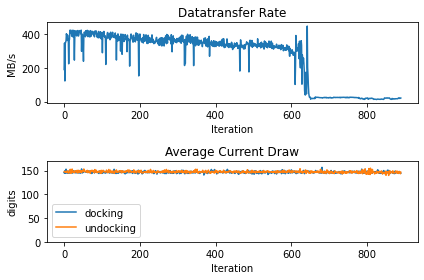

In [9]:
plot_stats(results)

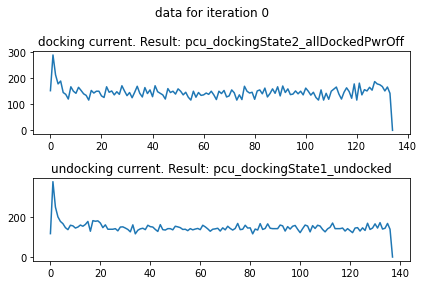

In [8]:
plot_iteration(results, 0)

In [10]:
with open(f'results_900runs_tranferratesMurks_{datetime.now().isoformat()}.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(results, file)

In [4]:
from datetime import datetime
     

'2023-09-21 21-04'

In [10]:
hil.pcu.get_currentlog()

calling pcu with get currentlog


[297,
 232,
 190,
 149,
 153,
 144,
 153,
 143,
 161,
 146,
 148,
 124,
 155,
 159,
 168,
 162,
 176,
 183,
 175,
 144,
 153,
 133,
 154,
 146,
 141,
 147,
 129,
 135,
 146,
 154,
 141,
 148,
 138,
 141,
 139,
 135,
 144,
 135,
 144,
 154,
 148,
 141,
 138,
 143,
 134,
 159,
 152,
 144,
 132,
 133,
 138,
 142,
 133,
 154,
 126,
 128,
 148,
 142,
 144,
 129,
 146,
 143,
 149,
 138,
 140,
 140,
 133,
 143,
 133,
 147,
 160,
 152,
 139,
 136,
 136,
 130,
 158,
 146,
 141,
 139,
 136,
 155,
 116,
 147,
 139,
 125,
 116,
 133,
 135,
 143,
 137,
 134,
 141,
 138,
 138,
 156,
 138,
 145,
 136,
 148,
 140,
 151,
 160,
 136,
 139,
 157,
 163,
 140,
 136,
 154,
 157,
 136,
 138,
 158,
 162,
 143,
 134,
 153,
 154,
 139,
 138,
 164,
 159,
 145,
 133,
 155,
 144,
 141,
 140,
 166,
 151,
 157,
 164,
 142,
 147,
 0]